<a href="https://colab.research.google.com/github/kwanjira16254200/pandas/blob/main/%E0%B9%83%E0%B8%AA%E0%B9%88%E0%B8%AA%E0%B8%B9%E0%B8%95%E0%B8%A3%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%87%E0%B8%87%E0%B9%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
fooddata = pd.read_csv('ใส่สูตรแล้ว.csv', header = None)

In [6]:
df = pd.DataFrame(columns = ['Item', 'Count'])
for i in range(0,fooddata.shape[0]):
    for j in range(0, fooddata.shape[1]):
      if fooddata.loc[i,j] in df.Item.values:
        df.iloc[df.loc[df['Item']==fooddata.loc[i,j]].index[0],1]     = df.iloc[df.loc[df['Item']==fooddata.loc[i,j]].index[0],1] + 1
      elif fooddata.loc[i,j] is np.nan:
          continue
      else:
         df.loc[df.shape[0]] = [fooddata.loc[i,j],1]
         df_desc = df.sort_values(by = 'Count',ascending = False)
         df_desc.head()

[Text(0, 0, '0'), Text(0, 0, '1'), Text(0, 0, '???????'), Text(0, 0, '??????')]

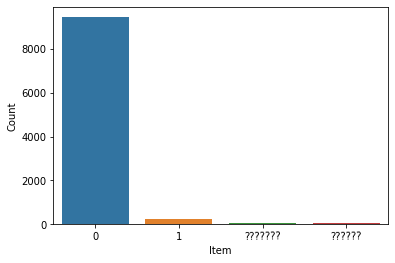

In [14]:
ax = sns.barplot(x='Item', y='Count', data=df_desc[df_desc.Count>=30])
ax.set_xticklabels(ax.get_xticklabels(),rotation=1)

In [16]:
dataset = []
for i in range(0, fooddata.shape[0]):
   temp = []
   for j in range(0, fooddata.shape[1]):
    if not fooddata.loc[i,j] is np.nan:
      temp.append(fooddata.loc[i,j])
      dataset.append(temp)

In [17]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
#apriori
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
#association_rules
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets,metric='lift', min_threshold=1)
rules2 = rules[ (rules['confidence'] > 0.3) & (rules['lift'] > 1) ]
